In [1]:
import numpy as np

$$\bold{W}\leftarrow \bold{W}-\eta\frac{\partial L}{\partial \bold{W}}$$


In [ ]:
# SGD - stochaostic gradient descent - 随机梯度下降
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

$$
\bold{v} \leftarrow \alpha \bold{v} - \eta\frac{\partial L}{\partial \bold{W}}
$$
$$
\bold{W} \leftarrow \bold{W} + \bold{v}
$$

In [2]:
# Momentum - 梯度表现为“加速度”，通过速度v来改变权重

class Momentum:
    def __init__(self, lr=0.01, alpha=0.9):
        self.lr = lr
        self.alpha = alpha  # alpha 通常 在0～1之间，表示自然界中由于阻力，速度会慢慢变为0
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)  # 为不同层的参数分配速度v数组
        for key in params.keys():
            self.v[key] = self.alpha * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [6]:
a = np.array([[1, 2], [3, 4]])
1 / a, a / a

(array([[1.        , 0.5       ],
        [0.33333333, 0.25      ]]),
 array([[1., 1.],
        [1., 1.]]))

$$
\bold{h} \leftarrow \bold{h} + \frac{\partial L}{\partial \bold W} \odot \frac{\partial L}{\partial \bold W}
$$
$$
\bold{W} \leftarrow \bold{W} - \frac{1}{\sqrt{\bold h}} \odot \eta\frac{\partial L}{\partial \bold W}
$$

In [1]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr *grads[key] * (self.h[key] + 1e-7)  # 1e - 7 防止h的分母过小，出现NAN

In [2]:
# 隐藏层的激活值分布(sigmoid)

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100                  # 隐藏层节点数
hidden_layer_size = 5           # 隐藏层层数
activation = {}                 # 激活值保存

for i in range(hidden_layer_size):
    if i != 0:
        x = activation[i-1]     # 如果不是第0层，则x为上一层的激活值

    w = np.random.randn(node_num, node_num) * 1  # 标准差为1的高斯分布
    a = np.dot(x, w)
    z = sigmoid(a)
    activation[i] = z

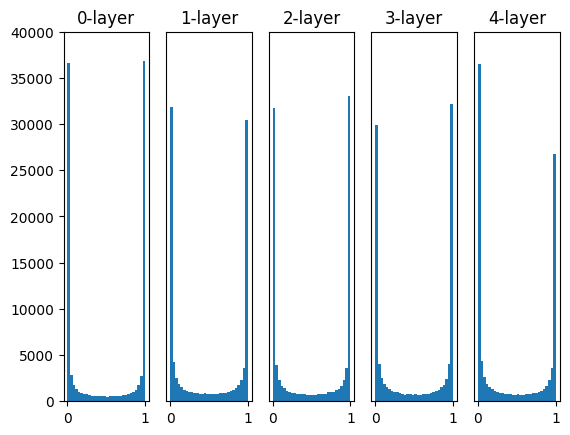

In [14]:
# 直方图 - 梯度消失，表现力受限
for i, z in activation.items():
    plt.subplot(1, len(activation), i+1)
    plt.title(f"{i}-layer")
    if i != 0: plt.yticks([], [])
    plt.ylim([0, 40000])
    plt.hist(z.flatten(), 30, range=(0,1))
plt.show()
# 大多数的激活值分布在0和1处，此时梯度非常小，意味着很多神经元学不到东西

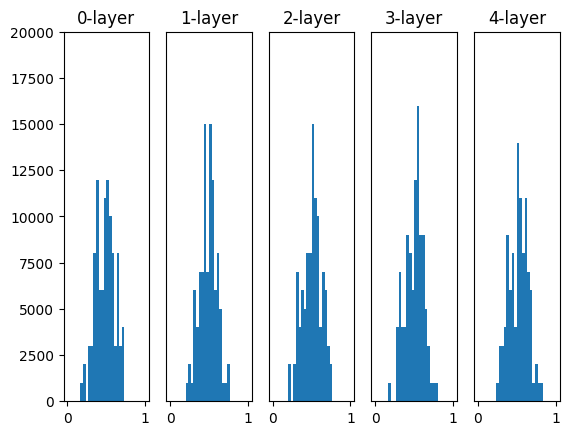

In [18]:
# 通过Xavier提出的标准差改善sigmoid梯度消失
for i in range(hidden_layer_size):
    if i != 0:
        x = activation[i-1]     # 如果不是第0层，则x为上一层的激活值

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)  # 标准差为1的高斯分布
    a = np.dot(x, w)
    z = sigmoid(a)
    activation[i] = z
for i, z in activation.items():
    plt.subplot(1, len(activation), i+1)
    plt.title(f"{i}-layer")
    if i != 0: plt.yticks([], [])
    plt.ylim([0, 20000])
    plt.hist(z.flatten(), 30, range=(0,1))
plt.show()